<a id='top'></a>
<img align="center" src="https://miro.medium.com/max/737/1*Xap6OxaZvD7C7eMQKkaHYQ.jpeg" width="200" />
<p style="text-align: center;">
    <font size='5' type='bold'>
        <b>Employee Attrition</b>
    </font>
</p>

<div style="text-align: right">
    <i>"<b>Attrition</b> - a gradual reduction in work force without firing of personnel, <br/>
        as when workers resign or retire and are not replaced."</i>
</div>  

### Содержание

<a href='#section_0'>Задачи проекта</a>

<a href='#section_1'>Подготовка данных</a>

<a href='#section_2'>Сводная статистическая информация</a>

<a href='#section_3'>Категоризация данных</a>

<a href='#section_4'>Обучение модели</a>

* <a href='#section_4_1'>Дерево решений</a>
* <a href='#section_4_2'>Случайный лес</a>
* <a href='#section_4_3'>Логистическая регрессия</a>

<a href='#section_5'>Тестирование модели</a>

<a id='section_0'></a>
### Задачи проекта
Необходимо проанализировать обезличенные HR данные о сотрудниках компании N на предмет важных закономерностей, которые могут принести компании пользу. Раскрыть факторы, которые приводят к «истощению сотрудников» (Employee Attrition). Возможно использование любых доступных средств аналитики данных, в том числе методов математической статистики и машинного обучения. Результаты необходимо представить в виде файла с решением (интерактивная тетрадка) и презентации, где будут отражены основные результаты работы.  


In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

rnd_state = 260686


<a href='#top'>Back to top</a>

<a id='section_1'></a>
### Подготовка данных

In [2]:
df = pd.read_excel('Company_HR_Employees.xlsx', sheet_name=0, engine='openpyxl')

In [3]:
# Выведем общую информацию о представленных данных листа HR-Employee-Info

print('_/_/_/ Общая информация _/_/_/')
display(df.info())
print('_/_/_/ Пропущенные значения _/_/_/')
display(df.isna().sum().sort_values(ascending=False))
print('_/_/_/ Дубликаты _/_/_/')
display(df.duplicated().sum())
print('_/_/_/ Таблица _/_/_/')
display(df.head(3))


_/_/_/ Общая информация _/_/_/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64

None

_/_/_/ Пропущенные значения _/_/_/


YearsWithCurrManager        0
EmployeeNumber              0
JobRole                     0
JobLevel                    0
JobInvolvement              0
HourlyRate                  0
Gender                      0
EnvironmentSatisfaction     0
EducationField              0
YearsSinceLastPromotion     0
Education                   0
DistanceFromHome            0
Department                  0
DailyRate                   0
BusinessTravel              0
Attrition                   0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
Age       

_/_/_/ Дубликаты _/_/_/


0

_/_/_/ Таблица _/_/_/


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,2068,2,...,1,80,0,6,3,4,4,3,1,2
1,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,4,80,0,17,3,2,9,6,0,8
2,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,2,80,1,6,0,3,6,2,0,3


В данных тестовой выборки представлено 1470 строк (объектов) и 34 столбца (признака, 25 из которых с целочисленным типом данных *int64* и 9 с типом данных *object*). Дубликатов и пропущенных значений в данных не обнаружено.

Из постановки задачи очевидно, что нашим целевым признаком является:
- Attrition — факт ухода сотрудника

Признаки, которые необходимо оценить с точки зрения их влияния на целевой признак, являются:
- Age - возраст
- BusinessTravel - частота командировок
- DailyRate
- Department - отдел
- DistanceFromHome - удаленность от дома
- Education - образование
- EducationField - сфера образования
- EmployeeNumber - номер сотрудника
- EnvironmentSatisfaction - удовлетворенность
- Gender - пол
- HourlyRate - часовая ставка
- JobInvolvement - уровень вовлеченности сотрудника в работу, как много ресурсов (время, знания и пр.) сотрудник тратит на работу
- JobLevel
- JobRole - позиция
- JobSatisfaction - общая удовлетворенность сотрудника своей работой
- MaritalStatus - семейное положение
- MonthlyIncome - месячный заработок
- MonthlyRate
- NumCompaniesWorked - количество компаний,где ранее работал сотрудник
- Over18 - сотрудник старше 18 лет
- OverTime - переработки
- PercentSalaryHike
- PerformanceRating - оценка работы сотрудника
- RelationshipSatisfaction
- StandardHours
- StockOptionLevel - уровень вознаграждения в виде опционов на акции компании
- TotalWorkingYears - общиий трудовой стаж
- TrainingTimesLastYear - количество учебных курсов за прошедший год
- WorkLifeBalance
- YearsAtCompany - трудовой стаж в компании
- YearsInCurrentRole - количество лет на текущей должности
- YearsSinceLastPromotion - количество лет с момента последнего повышения
- YearsWithCurrManager - количество лет с текущим руководителем


Для колонки `Attrition` проведем категоризацию с заменой классов `Yes` и `No` на  `1` и `0`.

In [4]:
df = pd.get_dummies(df, columns=['Attrition'], dtype='int64', drop_first=True)

Создадим класс для представления графиков и статистики

In [5]:
class AttritionStat():
    def plot_cat_bar(name, df_dict):
        # создадим сводную таблицу, отображающую уход сотрудника
        attrition_pivot = df.pivot_table(index = [name+'_id'], columns = 'Attrition_Yes', values = name, aggfunc = 'count')
        attrition_pivot['total'] = attrition_pivot[0] + attrition_pivot[1]
        attrition_pivot['% attrition'] = attrition_pivot[1] / attrition_pivot['total']
        attrition_pivot['% attrition'] = pd.Series([round(val * 100, 1) for val in attrition_pivot['% attrition']], index = attrition_pivot['% attrition'].index)
        attrition_pivot[name] = df_dict[name]

        # положим на график
        if name not in ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating',
                    'RelationshipSatisfaction', 'WorkLifeBalance']:
            attrition_pivot = attrition_pivot.sort_values('% attrition', ascending = False).reset_index(drop=True)
        plt.bar(attrition_pivot[name], attrition_pivot['% attrition'])
        plt.title(name + ' attrition')
        plt.xlabel(name + ' category', fontsize=14)
        plt.ylabel('% attrition', fontsize=14)
        plt.xticks(rotation=90)
        
    def plot_num_bar(name):
        # создадим сводную таблицу, отображающую уход сотрудника
        df[name+'_value'] = df[name].copy()
        attrition_pivot = df.pivot_table(index = [name+'_value'], columns = 'Attrition_Yes', values = name, aggfunc = 'count')
        attrition_pivot['total'] = attrition_pivot[0] + attrition_pivot[1]
        attrition_pivot['% attrition'] = attrition_pivot[1] / attrition_pivot['total']
        attrition_pivot['% attrition'] = pd.Series([round(val * 100, 1) for val in attrition_pivot['% attrition']], index = attrition_pivot['% attrition'].index)
        attrition_pivot[name] = attrition_pivot.index
        df.drop(columns=[name+'_value'], inplace=True)

        # положим на график
        if name not in ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating',
                    'RelationshipSatisfaction', 'WorkLifeBalance']:
            attrition_pivot = attrition_pivot.sort_values('% attrition', ascending = False).reset_index(drop=True)
        plt.bar(attrition_pivot[name], attrition_pivot['% attrition'])
        plt.title(name + ' attrition')
        plt.xlabel(name, fontsize=14)
        plt.ylabel('% attrition', fontsize=14)
        plt.xticks(rotation=90)
        
    def plot_num(name):
        # создадим сводную таблицу, отображающую уход сотрудника
        df[name+'_value'] = df[name].copy()
        attrition_pivot = df.pivot_table(index = [name+'_value'], columns = 'Attrition_Yes', values = name, aggfunc = 'count')
        attrition_pivot['total'] = attrition_pivot[0] + attrition_pivot[1]
        attrition_pivot['% attrition'] = attrition_pivot[1] / attrition_pivot['total']
        attrition_pivot['% attrition'] = pd.Series([round(val * 100, 1) for val in attrition_pivot['% attrition']], index = attrition_pivot['% attrition'].index)
        attrition_pivot[name] = attrition_pivot.index
        df.drop(columns=[name+'_value'], inplace=True)
        
        # положим на график
        if name not in ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating',
                    'RelationshipSatisfaction', 'WorkLifeBalance']:
            attrition_pivot = attrition_pivot.sort_values('% attrition', ascending = False).reset_index(drop=True)
        plt.scatter(attrition_pivot[name], attrition_pivot['% attrition'])
        plt.title(name + ' attrition')
        plt.xlabel(name, fontsize=14)
        plt.ylabel('% attrition', fontsize=14)
        plt.xticks(rotation=90)
        
    def boxplot(num_value, cat_feature):
        sns.set_theme(style='ticks')

        f, ax = plt.subplots(figsize=(7, 6))
        
        df[cat_feature] = df[cat_feature].astype('category')
        sns.boxplot(x=num_value, y=cat_feature, data=df,
                    whis=[0, 100], width=.6, palette='Blues')

        sns.stripplot(x=num_value, y=cat_feature, data=df,
                      size=4, color='.3', linewidth=0)

        ax.xaxis.grid(True)
        ax.set(ylabel=cat_feature)
        sns.despine(trim=True, left=True)

<a href='#top'>Back to top</a>

<a id='section_2'></a>
### Сводная статистическая информация

In [6]:
# Посмотрим на статистику по количественным признакам

display(df.select_dtypes(exclude='object').describe())

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


Данные таблиц и построенных диаграмм дают представление, как о персонале компании в целом, так и о портрете образцового сотрудника компании N, являющегося человеком средних лет с высшим образованием с высоким уровнем вовлеченности в работу, высоким уровнем удовлетворенности работой, работающим в компании на протяжении последних 5 лет и живущим со своей семьей в 20 минутах езды от работы.

In [7]:
# Посмотрим на статистику по категориальным признакам

display(df.select_dtypes(include='object').describe())

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


Из дальнейшего анализа можно исключить значения столбцов `Over18` и `StandardHours`, так как они представлены всего одним значением для всего набора данных. 

In [8]:
df.drop(columns=['Over18', 'StandardHours'], inplace=True)

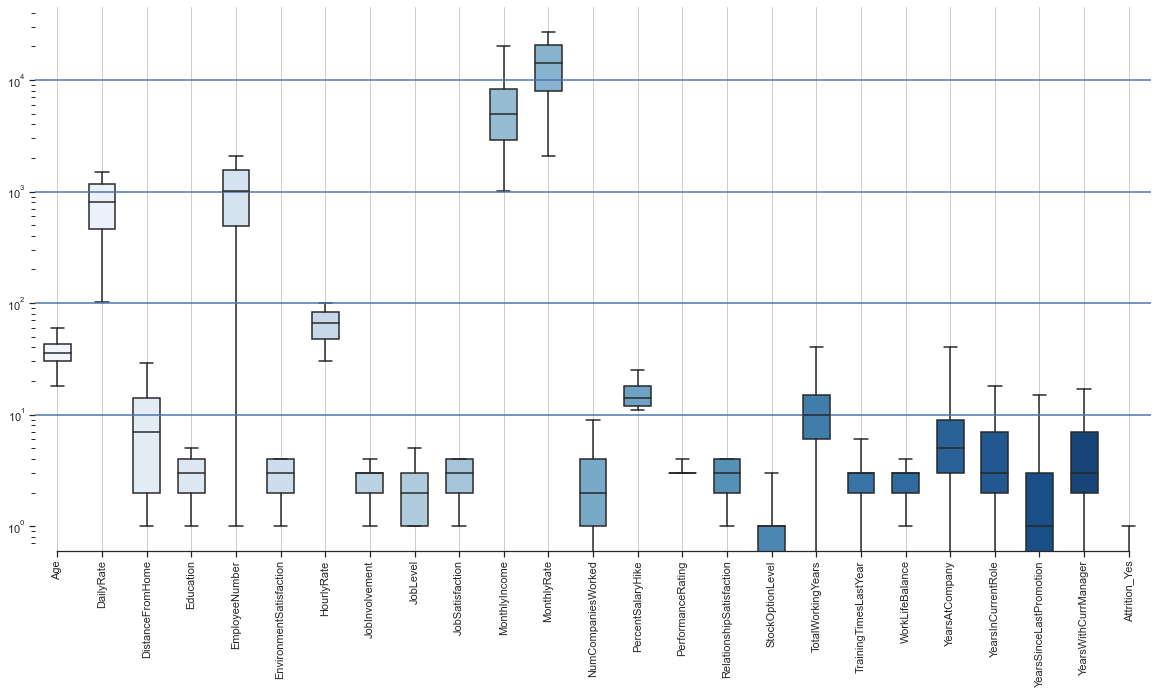

In [9]:
# Построим диаграммы размаха для числовых признаков

data = df.select_dtypes(exclude='object')

sns.set_theme(style='ticks')

f, ax = plt.subplots(figsize=(20, 10))
ax.set_yscale("log")

sns.boxplot(data=data, whis=[0, 100], width=.6, palette='Blues')

ax.xaxis.grid(True)
ax.set(ylabel='')
ax.axhline(10, ls='-')
ax.axhline(100, ls='-')
ax.axhline(1000, ls='-')
ax.axhline(10000, ls='-')
plt.xticks(rotation=90)
sns.despine(trim=True, left=True)

<a href='#top'>Back to top</a>

<a id='section_3'></a>
### Категоризация признаков

Классифицируем данные таблицы для последующей работы с моделями.
Для того, чтобы оптимально хранить информацию о категориях, создадим отдельные файлы-словари, где названию категории соответствует номер. Этот номер в дальнейшем может использоваться вместо текстового наименования категории в таблице.

Из листа `Data Description` файла с данными перенесем категории в словари для удобства работы

In [10]:
df = df.rename(columns = {'Education': 'Education_id',
                         'EnvironmentSatisfaction': 'EnvironmentSatisfaction_id',
                         'JobInvolvement': 'JobInvolvement_id',
                         'JobSatisfaction': 'JobSatisfaction_id',
                         'PerformanceRating': 'PerformanceRating_id',
                         'RelationshipSatisfaction': 'RelationshipSatisfaction_id',
                         'WorkLifeBalance': 'WorkLifeBalance_id'}, inplace = False)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          1470 non-null   int64 
 1   BusinessTravel               1470 non-null   object
 2   DailyRate                    1470 non-null   int64 
 3   Department                   1470 non-null   object
 4   DistanceFromHome             1470 non-null   int64 
 5   Education_id                 1470 non-null   int64 
 6   EducationField               1470 non-null   object
 7   EmployeeNumber               1470 non-null   int64 
 8   EnvironmentSatisfaction_id   1470 non-null   int64 
 9   Gender                       1470 non-null   object
 10  HourlyRate                   1470 non-null   int64 
 11  JobInvolvement_id            1470 non-null   int64 
 12  JobLevel                     1470 non-null   int64 
 13  JobRole                      1470

None

In [11]:
columns = ['Education_id', 'Education']
data = [[0, None], [1, 'Below College'], [2, 'College'], [3, 'Bachelor'], [4, 'Master'], [5, 'Doctor']]
df_dict_edu_level = pd.DataFrame(data=data, columns=columns)
df_dict_edu_level

,Education_id,Education
0,0,None
1,1,Below College
2,2,College
3,3,Bachelor
4,4,Master
5,5,Doctor


In [12]:
columns = ['EnvironmentSatisfaction_id', 'EnvironmentSatisfaction']
data = [[0, None], [1, 'Low'], [2, 'Medium'], [3, 'High'], [4, 'Very High']]
df_dict_env = pd.DataFrame(data=data, columns=columns)
df_dict_env


,EnvironmentSatisfaction_id,EnvironmentSatisfaction
0,0,None
1,1,Low
2,2,Medium
3,3,High
4,4,Very High


In [13]:
columns = ['JobInvolvement_id', 'JobInvolvement']
data = [[0, None], [1, 'Low'], [2, 'Medium'], [3, 'High'], [4, 'Very High']]
df_dict_job_inv = pd.DataFrame(data=data, columns=columns)
df_dict_job_inv


,JobInvolvement_id,JobInvolvement
0,0,None
1,1,Low
2,2,Medium
3,3,High
4,4,Very High


In [14]:
columns = ['JobSatisfaction_id', 'JobSatisfaction']
data = [[0, None], [1, 'Low'], [2, 'Medium'], [3, 'High'], [4, 'Very High']]
df_dict_job_sat = pd.DataFrame(data=data, columns=columns)
df_dict_job_sat


,JobSatisfaction_id,JobSatisfaction
0,0,None
1,1,Low
2,2,Medium
3,3,High
4,4,Very High


In [15]:
columns = ['PerformanceRating_id', 'PerformanceRating']
data = [[0, None], [1, 'Low'], [2, 'Good'], [3, 'Excellent'], [4, 'Outstanding']]
df_dict_perf = pd.DataFrame(data=data, columns=columns)
df_dict_perf


,PerformanceRating_id,PerformanceRating
0,0,None
1,1,Low
2,2,Good
3,3,Excellent
4,4,Outstanding


In [16]:
columns = ['RelationshipSatisfaction_id', 'RelationshipSatisfaction']
data = [[0, None], [1, 'Low'], [2, 'Medium'], [3, 'High'], [4, 'Very High']]
df_dict_rel_sat = pd.DataFrame(data=data, columns=columns)
df_dict_rel_sat


,RelationshipSatisfaction_id,RelationshipSatisfaction
0,0,None
1,1,Low
2,2,Medium
3,3,High
4,4,Very High


In [17]:
columns = ['WorkLifeBalance_id', 'WorkLifeBalance']
data = [[0, None], [1, 'Bad'], [2, 'Good'], [3, 'Better'], [4, 'Best']]
df_dict_wlb = pd.DataFrame(data=data, columns=columns)
df_dict_wlb


,WorkLifeBalance_id,WorkLifeBalance
0,0,None
1,1,Bad
2,2,Good
3,3,Better
4,4,Best


Дополним таблицу

In [18]:
names = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement',
         'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
         'WorkLifeBalance']

df_dicts = [df_dict_edu_level, df_dict_env, df_dict_job_inv, df_dict_job_sat,
            df_dict_perf, df_dict_rel_sat, df_dict_wlb]

idx = 0
for df_dict in df_dicts:
    name = names[idx]
    idx += 1
    df[name] = df[name+'_id']
    for i in range(len(df_dict)):
        df.loc[df[name] == df_dict[name+'_id'][i], name] = df_dict[name][i]

df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education_id,EducationField,EmployeeNumber,EnvironmentSatisfaction_id,Gender,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,34,Travel_Rarely,628,Research & Development,8,3,Medical,2068,2,Male,...,1,2,0,Bachelor,Medium,Very High,High,Excellent,Low,Best
1,49,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,Male,...,0,8,0,Bachelor,Very High,Medium,Medium,Excellent,Very High,Good
2,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,Male,...,0,3,0,Bachelor,Medium,Very High,Medium,Outstanding,Medium,Better
3,39,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,Male,...,1,7,0,Below College,Very High,Medium,Low,Excellent,Low,Better
4,36,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,Male,...,0,3,0,College,High,Very High,Very High,Excellent,High,Better


Добавим идентификатор каждой категории по частоте командировок и выделим эти данные в отдельный словарь.

In [19]:
business_travel_list = df['BusinessTravel'].unique()

count = 0
for row in df['BusinessTravel']:
    if row == business_travel_list[0]:
        business_travel_id = 0
    if row == business_travel_list[1]:
        business_travel_id = 1
    if row == business_travel_list[2]:
        business_travel_id = 2
    df.loc[count,'BusinessTravel_id'] = business_travel_id
    count += 1

df['BusinessTravel_id'] = df['BusinessTravel_id'].astype('int')
df_dict_travel = df[['BusinessTravel', 'BusinessTravel_id']]
df_dict_travel = df_dict_travel.drop_duplicates().reset_index(drop = True)
df_dict_travel

,BusinessTravel,BusinessTravel_id
0,Travel_Rarely,0
1,Travel_Frequently,1
2,Non-Travel,2


Проделаем ту же операцию для категорий `Department`, `EducationField`, `JobRole`, `MaritalStatus`, `Gender` и `OverTime`.

In [20]:
department_list = df['Department'].unique()

count = 0
for row in df['Department']:
    if row == department_list[0]:
        department_id = 0
    if row == department_list[1]:
        department_id = 1
    if row == department_list[2]:
        department_id = 2
    df.loc[count,'Department_id'] = department_id
    count += 1

df['Department_id'] = df['Department_id'].astype('int')
df_dict_dpt = df[['Department', 'Department_id']]
df_dict_dpt = df_dict_dpt.drop_duplicates().reset_index(drop = True)
df_dict_dpt

,Department,Department_id
0,Research & Development,0
1,Sales,1
2,Human Resources,2


In [21]:
edu_list = df['EducationField'].unique()

count = 0
for row in df['EducationField']:
    if row == edu_list[0]:
        edu_id = 0
    if row == edu_list[1]:
        edu_id = 1
    if row == edu_list[2]:
        edu_id = 2
    if row == edu_list[3]:
        edu_id = 3
    if row == edu_list[4]:
        edu_id = 4
    if row == edu_list[5]:
        edu_id = 5
    df.loc[count,'EducationField_id'] = edu_id
    count += 1

df['EducationField_id'] = df['EducationField_id'].astype('int')
df_dict_edu = df[['EducationField', 'EducationField_id']]
df_dict_edu = df_dict_edu.drop_duplicates().reset_index(drop = True)
df_dict_edu

,EducationField,EducationField_id
0,Medical,0
1,Life Sciences,1
2,Other,2
3,Marketing,3
4,Technical Degree,4
5,Human Resources,5


In [22]:
job_list = df['JobRole'].unique()

count = 0
for row in df['JobRole']:
    if row == job_list[0]:
        job_id = 0
    if row == job_list[1]:
        job_id = 1
    if row == job_list[2]:
        job_id = 2
    if row == job_list[3]:
        job_id = 3
    if row == job_list[4]:
        job_id = 4
    if row == job_list[5]:
        job_id = 5
    if row == job_list[6]:
        job_id = 6
    if row == job_list[7]:
        job_id = 7
    if row == job_list[8]:
        job_id = 8
    df.loc[count,'JobRole_id'] = job_id
    count += 1

df['JobRole_id'] = df['JobRole_id'].astype('int')
df_dict_job = df[['JobRole', 'JobRole_id']]
df_dict_job = df_dict_job.drop_duplicates().reset_index(drop = True)
df_dict_job

,JobRole,JobRole_id
0,Laboratory Technician,0
1,Sales Executive,1
2,Manufacturing Director,2
3,Healthcare Representative,3
4,Sales Representative,4
5,Research Scientist,5
6,Human Resources,6
7,Manager,7
8,Research Director,8


In [23]:
marital_list = df['MaritalStatus'].unique()

count = 0
for row in df['MaritalStatus']:
    if row == marital_list[0]:
        marital_id = 0
    if row == marital_list[1]:
        marital_id = 1
    if row == marital_list[2]:
        marital_id = 2
    df.loc[count,'MaritalStatus_id'] = marital_id
    count += 1

df['MaritalStatus_id'] = df['MaritalStatus_id'].astype('int')
df_dict_marital = df[['MaritalStatus', 'MaritalStatus_id']]
df_dict_marital = df_dict_marital.drop_duplicates().reset_index(drop = True)
df_dict_marital

,MaritalStatus,MaritalStatus_id
0,Married,0
1,Single,1
2,Divorced,2


In [24]:
gender_list = df['Gender'].unique()

count = 0
for row in df['Gender']:
    if row == gender_list[0]:
        gender_id = 0
    if row == gender_list[1]:
        gender_id = 1
    df.loc[count,'Gender_id'] = gender_id
    count += 1

df['Gender_id'] = df['Gender_id'].astype('int')
df_dict_gender = df[['Gender', 'Gender_id']]
df_dict_gender = df_dict_gender.drop_duplicates().reset_index(drop = True)
df_dict_gender

,Gender,Gender_id
0,Male,0
1,Female,1


In [25]:
ot_list = df['OverTime'].unique()

count = 0
for row in df['OverTime']:
    if row == ot_list[0]:
        ot_id = 0
    if row == ot_list[1]:
        ot_id = 1
    df.loc[count,'OverTime_id'] = ot_id
    count += 1

df['OverTime_id'] = df['OverTime_id'].astype('int')
df_dict_ot = df[['OverTime', 'OverTime_id']]
df_dict_ot = df_dict_ot.drop_duplicates().reset_index(drop = True)
df_dict_ot

,OverTime,OverTime_id
0,No,0
1,Yes,1


Теперь представим очевидные закономерности. Посмотрим на взаимосвязь категориальных признаков

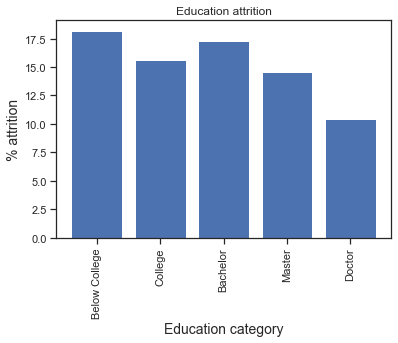

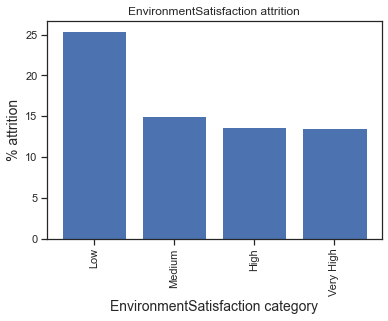

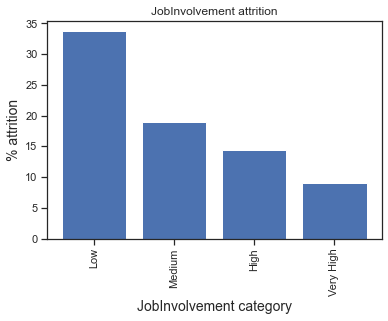

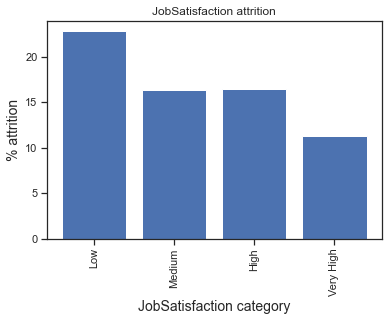

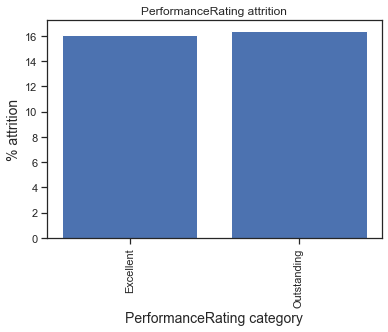

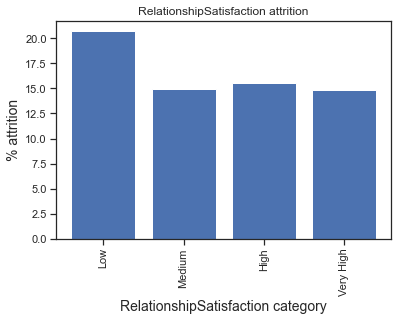

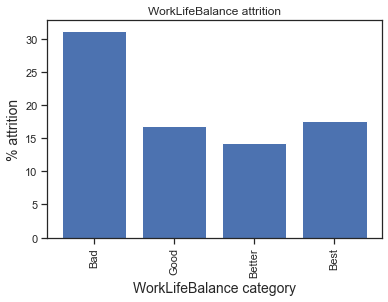

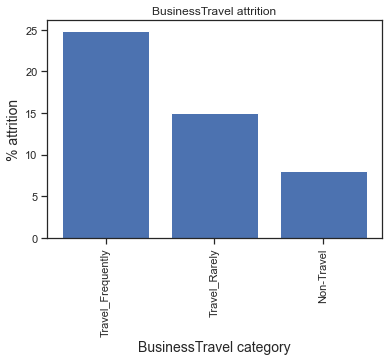

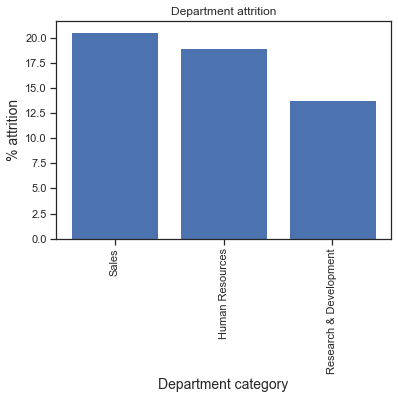

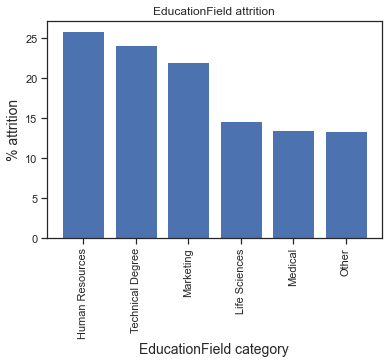

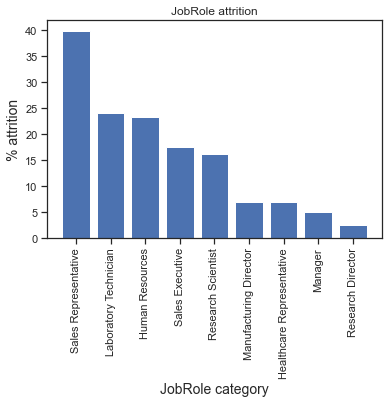

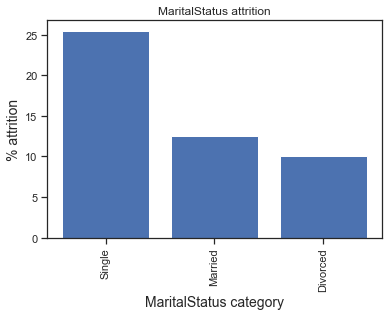

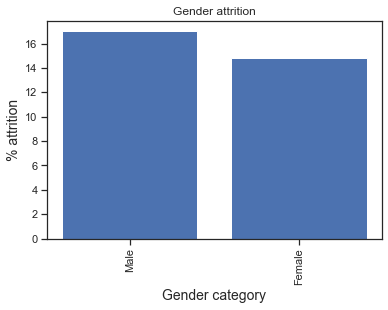

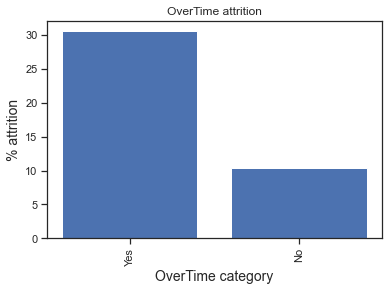

In [26]:
names_cat = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement',
             'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
             'WorkLifeBalance', 'BusinessTravel', 'Department', 'EducationField',
             'JobRole', 'MaritalStatus', 'Gender', 'OverTime']

df_dicts_cat = [df_dict_edu_level, df_dict_env, df_dict_job_inv, df_dict_job_sat,
                df_dict_perf, df_dict_rel_sat, df_dict_wlb, df_dict_travel, df_dict_dpt,
                df_dict_edu, df_dict_job, df_dict_marital, df_dict_gender, df_dict_ot]

for name, df_dict in zip(names_cat, df_dicts_cat):
    plt.show(AttritionStat.plot_cat_bar(name, df_dict))

Построим дополнительные графики

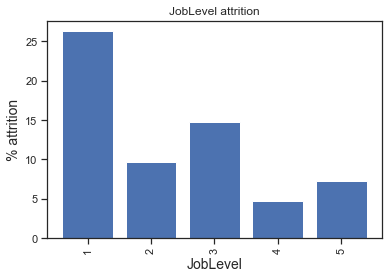

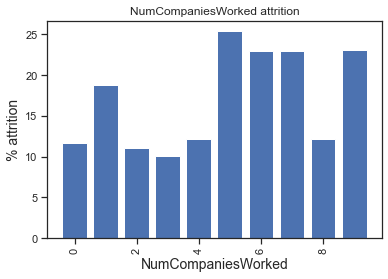

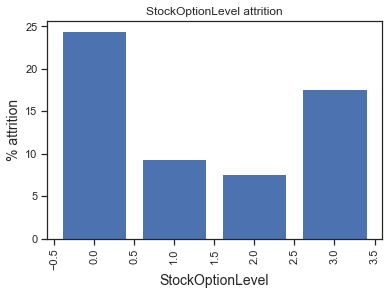

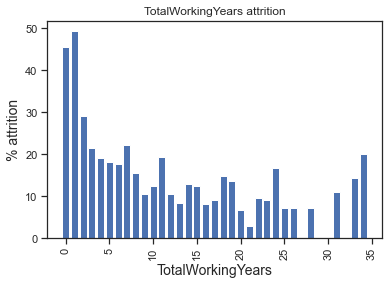

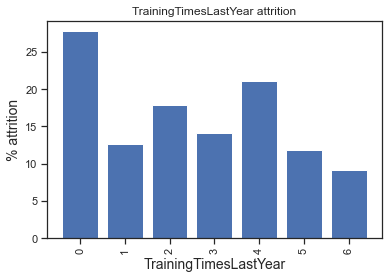

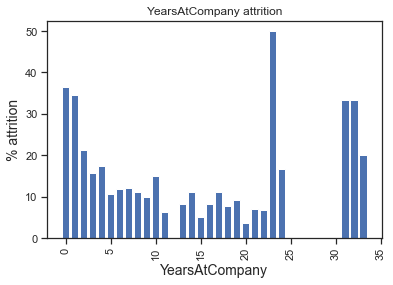

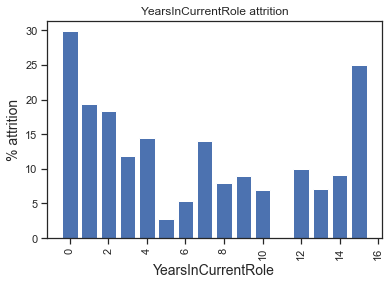

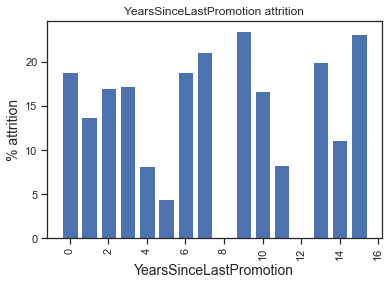

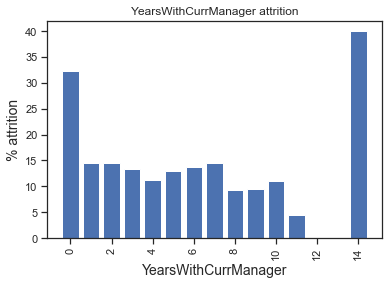

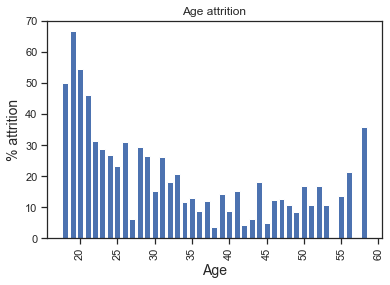

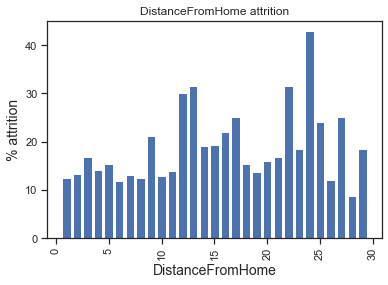

In [27]:
names_num = ['JobLevel', 'NumCompaniesWorked', 'StockOptionLevel', 'TotalWorkingYears',
             'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
             'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age', 'DistanceFromHome']

for name in names_num:
    plt.show(AttritionStat.plot_num_bar(name))

Посмотрим на взаимосвязь количественных признаков

Далее масштабируем числовые признаки.

In [28]:
# Выделим целевой признак (y) и признаки для обучения моделей (X)

y = df['Attrition_Yes']
X = df.select_dtypes(exclude='object').drop(columns=['Attrition_Yes'], axis=1)

In [29]:
scaler = StandardScaler()
scaler.fit_transform(X[names_num])

array([[-0.05778755, -0.27759435, -0.93201439, ..., -0.59522723,
        -0.32016256, -0.14714972],
       [-0.05778755, -0.27759435, -0.93201439, ...,  1.08689522,
         1.32236521, -0.88751511],
       [-0.05778755, -0.67804939,  0.24198831, ..., -0.31487349,
        -1.08667552, -0.64072665],
       ...,
       [-0.96148639,  1.32422583, -0.93201439, ..., -1.15593471,
         0.008343  , -0.88751511],
       [-0.05778755, -0.67804939,  0.24198831, ...,  0.80654148,
         1.32236521, -0.14714972],
       [-0.05778755,  2.12513592, -0.93201439, ...,  0.24583399,
         0.4463504 , -1.01090934]])

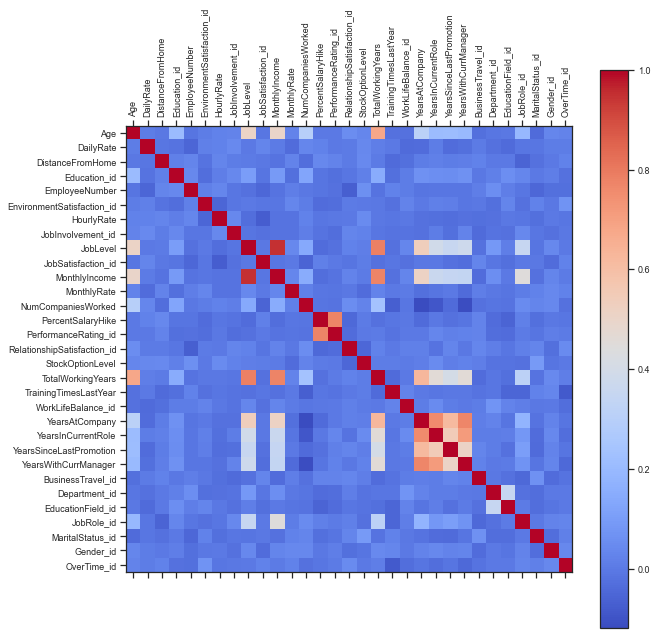

In [30]:
# Проверим модель на коллинеарность признаков

corr=X.corr()

cmap = plt.get_cmap('coolwarm')
f = plt.figure(figsize=(10, 10))

plt.matshow(corr, cmap=cmap, fignum=f.number)
plt.xticks(range(corr.shape[1]), corr.columns, fontsize=9, rotation=90)
plt.yticks(range(corr.shape[1]), corr.columns, fontsize=9)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=9)

Как можно заметить, сильно коррелируют между собой следующие признаки:
- `Age` и `TotalWorkingYears`
- `MonthlyIncome` и `JobLevel`
- `PercentSalaryHike` и `PerformanceRating_id`
- `YearsAtCompany`, `YearsInCurrentRole` и `YearsWithCurrManager`

Удалим признаки с сильной корреляцией (больше 0.8): `TotalWorkingYears`, `JobLevel`, `PerformanceRating_id`, `YearsInCurrentRole` и `YearsWithCurrManager`.


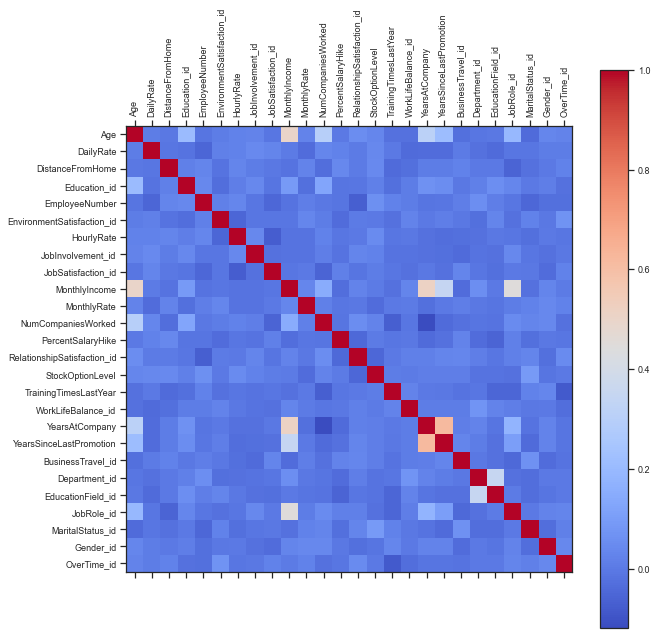

In [31]:
# Проверим модель на коллинеарность признаков
corr_cols = ['TotalWorkingYears', 'JobLevel', 'PerformanceRating_id',
             'YearsInCurrentRole', 'YearsWithCurrManager']

corr=X.drop(columns=corr_cols).corr()

cmap = plt.get_cmap('coolwarm')
f = plt.figure(figsize=(10, 10))

plt.matshow(corr, cmap=cmap, fignum=f.number)
plt.xticks(range(corr.shape[1]), corr.columns, fontsize=9, rotation=90)
plt.yticks(range(corr.shape[1]), corr.columns, fontsize=9)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=9)

<a href='#top'>Back to top</a>

<a id='section_4'></a>
### Обучение моделей
Перед нами задача бинарной классификации, решение которой поможет предсказать два возможных исхода - сотрудник уйдет, сотрудник останется. В качестве классификаторов будем использовать модели решающего дерева, случайного леса и логистической регрессии. Далее выявим признаки, наиболее влияющие на целевой признак ухода сотрудников.

Для оценки работы классификаторов будем использовать значения полноты и точности. Полнота демонстрирует способность алгоритма обнаруживать данный класс вообще, а точность — способность отличать этот класс от других классов. В качестве итоговой метрики качества будем использовать *F1*-меру, способную одновременно дать оценку по точности и полноте. 

Но сначала посмотрим на баланс классов, т.к. выраженный дисбаланс может привести к некорректной работе моделей при обучении.

0    0.838776
1    0.161224
Name: Attrition_Yes, dtype: float64


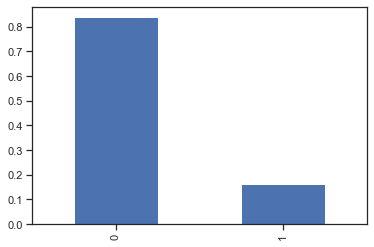

In [32]:
# Проверим, как часто в целевом признаке нашего исходного датасета встречается класс '1' или '0'

class_balance = df['Attrition_Yes'].value_counts(normalize=True)
class_balance.plot(kind='bar')
print(class_balance)
plt.show()

В данных прослеживается очевидный дисбаланс: объектов отрицательного класса в 4 раза больше, чем объектов положительного класса. Это помешает нам корректно обучать модели и получить высокий процент точных предсказаний.

In [33]:
# Создадим методы, которые помогут решить проблему с дисбалансом, а именно upsampling и downsampling

def downsample(X, y, fraction):
    """ Чтобы сделать объекты частого класса реже.
    """
    
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    X_downsampled = pd.concat([X_zeros.sample(frac=fraction, random_state=rnd_state)] + [X_ones])
    y_downsampled = pd.concat([y_zeros.sample(frac=fraction, random_state=rnd_state)] + [y_ones])
    
    X_downsampled, y_downsampled = shuffle(X_downsampled, y_downsampled, random_state=rnd_state)
    
    return X_downsampled, y_downsampled

def upsample(X, y, repeat):
    """ Чтобы сделать объекты редкого класса не такими редкими, самые важные
    повторяются по несколько раз.
    """
    
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    X_upsampled = pd.concat([X_zeros] + [X_ones] * repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)
    
    X_upsampled, y_upsampled = shuffle(X_upsampled, y_upsampled, random_state=rnd_state)
    
    return X_upsampled, y_upsampled


In [34]:
# Разделим датасет на обучающую и тестовую выборку

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=rnd_state)

# Тестовую выборку разделим в свою очередь на тестовую и валидационную

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=rnd_state)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(882, 31)
(882,)
(294, 31)
(294,)
(294, 31)
(294,)


<a id='section_4_1'></a>
#### Дерево решений

In [35]:
# Утяжелим объекты редкого класса с помощью параметра class_weight='balanced'
# Исследуем качество модели решающего дерева с различной глубиной

best_tree = None
best_score = 0

for max_depth in range(1, 16, 1):
    model = DecisionTreeClassifier(class_weight='balanced', max_depth=max_depth, random_state=rnd_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    result = f1_score(y_valid, y_pred)
    
    if result > best_score:
        best_tree = model
        best_score = result
        
print()
print('Качество лучшего дерева:', best_score)
print(best_tree)


Качество лучшего дерева: 0.4647887323943662
DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       random_state=260686)


У модели решающего дерева определенно хорошее качество - **0.46** с глубиной дерева **4.**

Попробуем уменьшить или увеличить выборку и проверим, как это повлияет на качество модели. Соотношение классов после применения данных методов должно быть одинаково. Соотношение классов у нас *5 к 1*, соотвественно, fraction и repeat возьмем *0.2 и 5*.

Начнем с уменьшения.

F1-мера на валидационной выборке: 0.37142857142857144
Баланс классов: 
 0    0.510345
1    0.489655
Name: Attrition_Yes, dtype: float64


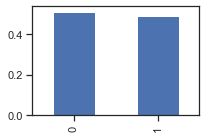

In [36]:
X_downsampled, y_downsampled = downsample(X_train, y_train, 0.2)
model = DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=rnd_state)
model.fit(X_downsampled, y_downsampled)
y_pred = model.predict(X_valid)
print(f'F1-мера на валидационной выборке: {f1_score(y_valid, y_pred)}')

class_balance = y_downsampled.value_counts(normalize=True)
class_balance.plot(kind='bar', figsize=(3, 2))
print('Баланс классов: \n', class_balance)
plt.show()


Получили качество - **0.37**. Проверим то же, но с увеличением выборки.

F1-мера на валидационной выборке: 0.4647887323943662
Баланс классов: 
 0    0.510345
1    0.489655
Name: Attrition_Yes, dtype: float64


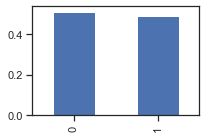

In [37]:
X_upsampled, y_upsampled = upsample(X_train, y_train, 5)
model = DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=rnd_state)
model.fit(X_upsampled, y_upsampled)
y_pred = model.predict(X_valid)
print(f'F1-мера на валидационной выборке: {f1_score(y_valid, y_pred)}')

class_balance = y_upsampled.value_counts(normalize=True)
class_balance.plot(kind='bar', figsize=(3, 2))
print('Баланс классов: \n', class_balance)
plt.show()


Получили хорошее качество модели на увеличенной выборке - **0.46**, что соответствует первоначальному значению с применением балансировки классов внутри модели. Этот результат выше, чем в случае с уменьшением выборки - **0.37**.

<a id='section_4_2'></a>
#### Случайный лес

In [38]:
best_forest = None
best_score = 0

for estim in range(10, 100, 20):
    model = RandomForestClassifier(class_weight='balanced', n_estimators=estim, max_depth=4, random_state=rnd_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    result = f1_score(y_valid, y_pred)

    if result > best_score:
        best_forest = model
        best_score = result
        
print()
print('Качество лучшего леса:', best_score)
print(best_forest)


Качество лучшего леса: 0.4791666666666667
RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=90,
                       random_state=260686)


Действительно, получили более качественную модель с числом деревьев **90** с F1-мерой на валидационной выборке - **0.48**

<a id='section_4_3'></a>
#### Логистическая регрессия

In [39]:
best_lr = None
best_score = 0
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for solver in solvers:
    model = LogisticRegression(class_weight='balanced', solver=solver, random_state=rnd_state)
    model.fit(X, y)
    y_pred = model.predict(X_valid)
    result = f1_score(y_valid, y_pred)
    
    if result > best_score:
        best_lr = model
        best_score = result
        
print()
print('Качество лучшей модели логистической регрессии:', best_score)
print(best_lr)


Качество лучшей модели логистической регрессии: 0.48951048951048953
LogisticRegression(class_weight='balanced', random_state=260686,
                   solver='liblinear')


Лучшее качество получено на модели логистической регрессии с алгоритмом оптимизации **liblinear** по F1-метрике - **0.49.**

In [40]:
# Проверим эффективность работы моделей с помощью кросс-валидации

X_cv = pd.concat([X_train, X_valid])
y_cv = pd.concat([y_train, y_valid])

cv_best_tree = np.average(cross_val_score(best_tree, X_cv, y_cv,
                          cv=5, scoring='f1'))
cv_best_forest = np.average(cross_val_score(best_forest, X_cv, y_cv,
                            cv=5, scoring='f1'))
cv_best_lr = np.average(cross_val_score(best_lr, X_cv, y_cv,
                                  cv=5, scoring='f1'))

print('Среднее качество модели решающего дерева: ', cv_best_tree)
print('Среднее качество модели случайного леса: ', cv_best_forest)
print('Среднее качество модели логистической регрессии: ', cv_best_lr)

Среднее качество модели решающего дерева:  0.41786501997028314
Среднее качество модели случайного леса:  0.49688461992326677
Среднее качество модели логистической регрессии:  0.4677604721185391


DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       random_state=260686)
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       198
           1       0.72      0.34      0.46        96

    accuracy                           0.74       294
   macro avg       0.73      0.64      0.65       294
weighted avg       0.74      0.74      0.71       294



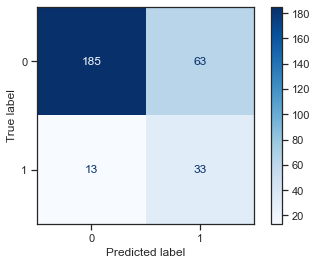

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=90,
                       random_state=260686)
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       244
           1       0.50      0.46      0.48        50

    accuracy                           0.83       294
   macro avg       0.70      0.68      0.69       294
weighted avg       0.82      0.83      0.83       294



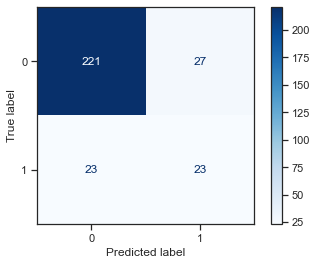

LogisticRegression(class_weight='balanced', random_state=260686,
                   solver='liblinear')
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       197
           1       0.76      0.36      0.49        97

    accuracy                           0.75       294
   macro avg       0.76      0.65      0.66       294
weighted avg       0.75      0.75      0.72       294



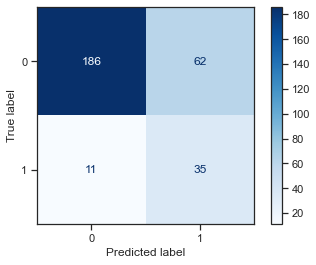

In [41]:
# Сопоставим предсказания и реальные данные валидационной выборки с помощью матрицы ошибок

best_models = [best_tree, best_forest, best_lr]

for model in best_models:
    y_pred = model.predict(X_valid)
    plot_confusion_matrix(model, X_valid, y_valid, cmap=plt.cm.Blues)
    print(model)
    print(classification_report(y_pred, y_valid))
    plt.show()


По результатам кросс-валидации выявлено, что лучшей по метрике F1 моделью среди рассмотренных является **модель случайного леса**. Однако, проанализировав матрицу ошибок, можно заключить, что предсказания положительного класса с применением модели случайного леса по точности близки к случайным, когда предсказание оказывается верным только в 50% случаев. Применяя эту модель, мы точно сможем сказать почему человек останется в компании. Но так как наша задача заключается в том, чтобы понять первоочередные причины ухода из компании нам будет более интересна модель логистической регрессии, имеющей сопоставимое с моделью случайного леса значение F1-меры, но обладающая большей точностью в определении меток положительного класса без потери полноты определения меток отрицательного класса.

In [42]:
best_lr.coef_

array([[-1.34993838e-02, -2.88076916e-04,  3.22476643e-02,
         3.50613551e-02, -1.10538395e-05, -3.14190197e-01,
         3.06038439e-03, -3.58540761e-01, -3.87398685e-02,
        -2.57689284e-01, -7.45482258e-05,  1.30254958e-05,
         1.54443939e-01, -1.00076523e-01,  1.31262562e+00,
        -1.54880581e-01, -4.72113160e-01, -6.04083370e-02,
        -8.48965792e-02, -8.78425684e-02,  1.20852804e-01,
        -1.55123223e-01,  1.55366994e-01, -1.37883677e-01,
        -3.33473734e-02,  3.41375636e-01,  2.23317430e-01,
        -1.06590836e-01, -4.66478771e-02, -2.47322298e-01,
         1.63526244e+00]])

Text(0.5, 1.0, 'Значимость признаков для модели логистической регрессии')

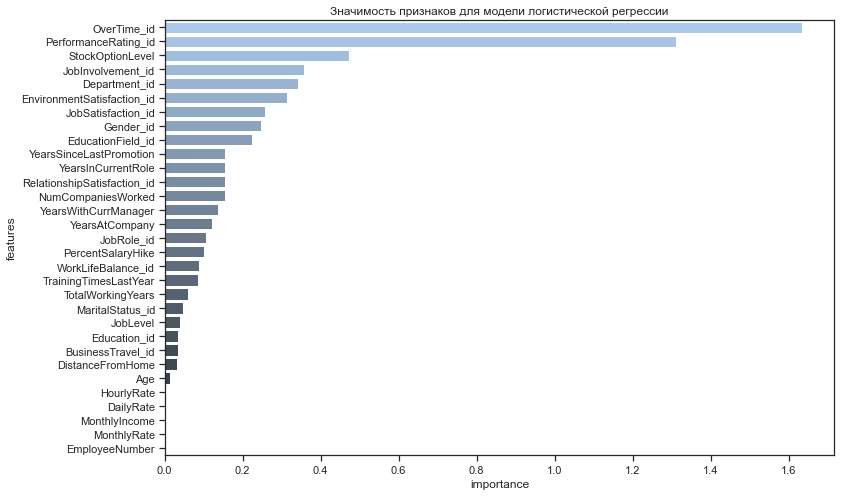

In [43]:
# Выведем график значимости признаков для лучшей модели

features = X_train.columns
importance = abs(best_lr.coef_[0])

feature_importances = pd.DataFrame({'features': features,
                                    'importance': importance})
feature_importances = feature_importances.sort_values(by='importance',
                                                      ascending=False).\
                                                      reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.set_color_codes('pastel')
sns.barplot(feature_importances['importance'], feature_importances['features'], palette='dark:b_r')

plt.title('Значимость признаков для модели логистической регрессии')


Исследовав качество разных моделей со сменой гиперпараметров и применив для оценки метод кросс-валидации, выявили, что модель логистической регрессии - оптимальна по качеству и скорости. Будем использовать данную модель для предсказаний на тестовой выборке.

Особое внимание обратим на Топ-5 признаков, обладающих наибольшей значимостью для модели, а значит с большей вероятностью влияют на решение сотрудника покинуть компанию это:
1. OverTime - переработки
2. PerformanceRating - оценка работы сотрудника
3. StockOptionLevel - уровень вознаграждения в виде опционов на акции компании
4. JobInvolvement - уровень вовлеченности сотрудника в работу, как много ресурсов (время, знания и пр.) сотрудник тратит на работу
5. Department - отдел

Посмотрим на статистику взаимосвязей некоторых признаков с Топ-5 наиболее значимых.

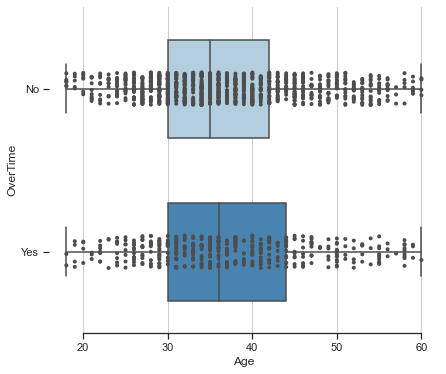

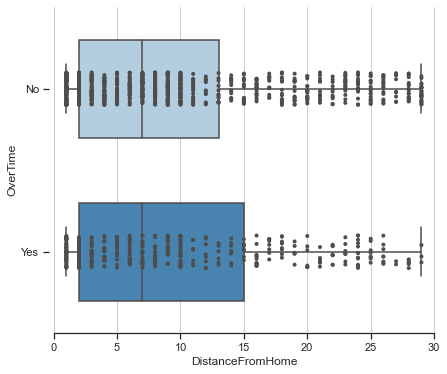

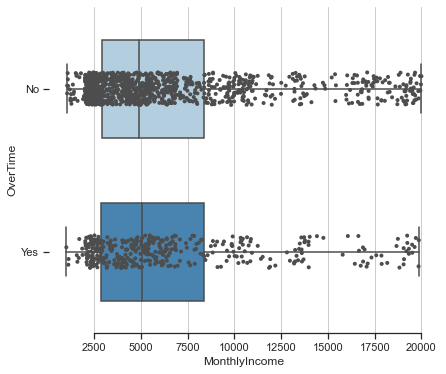

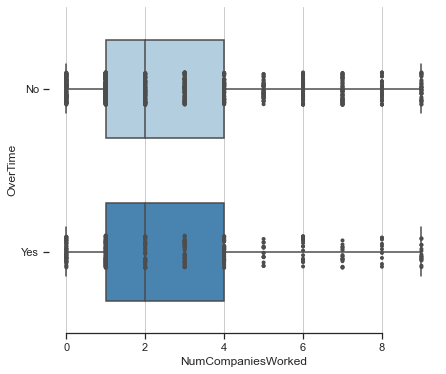

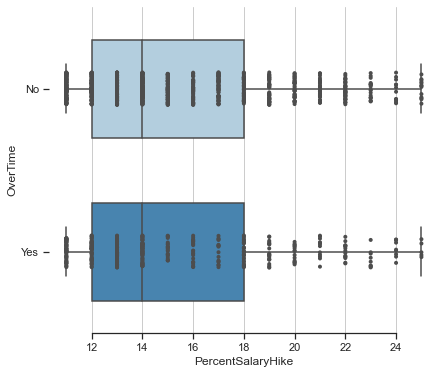

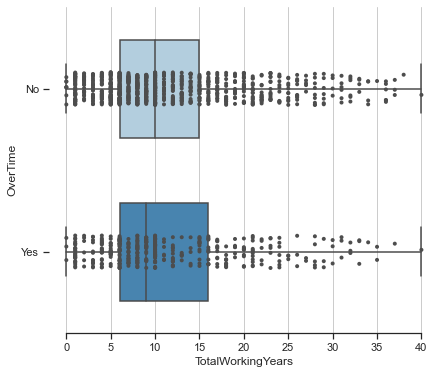

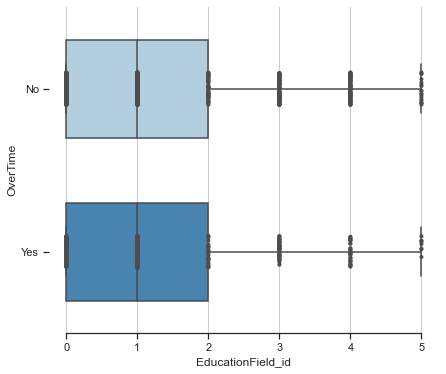

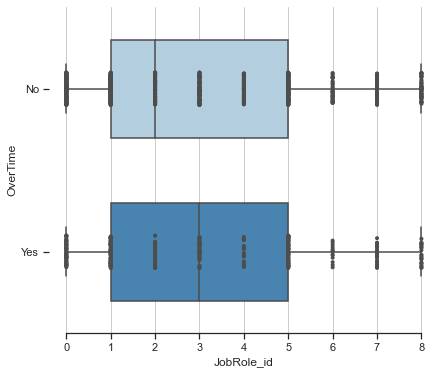

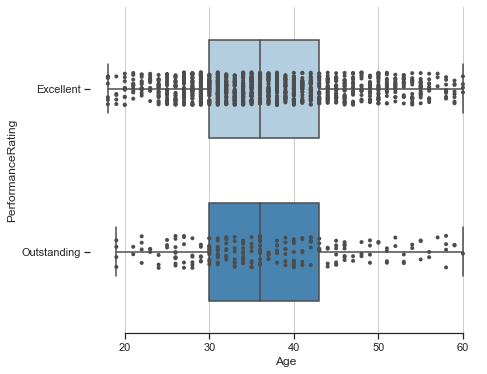

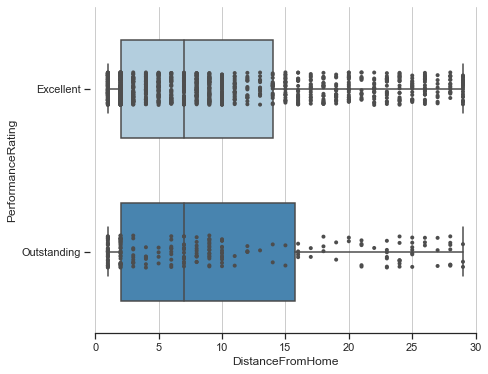

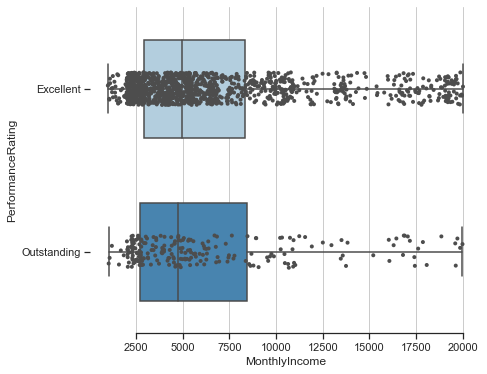

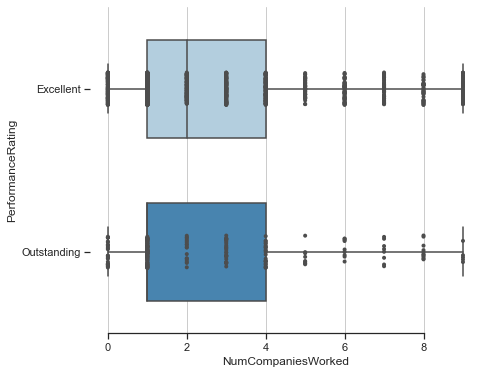

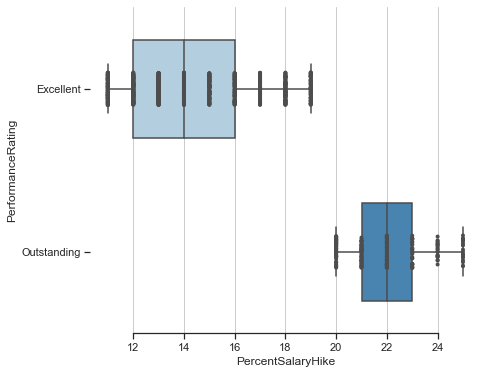

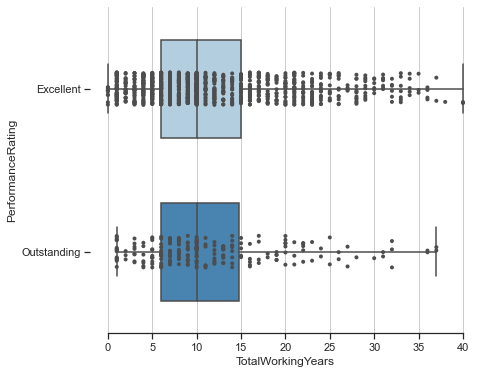

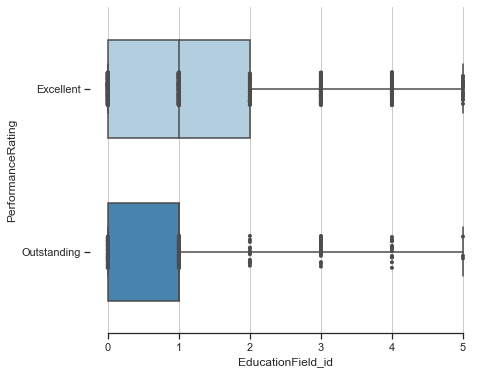

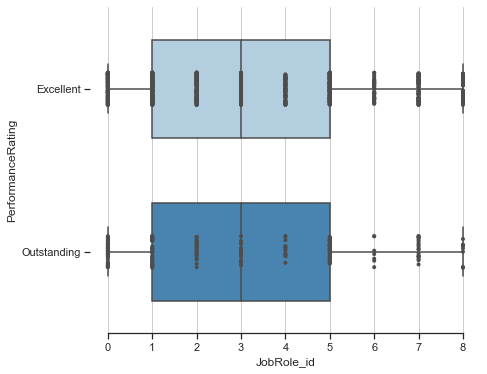

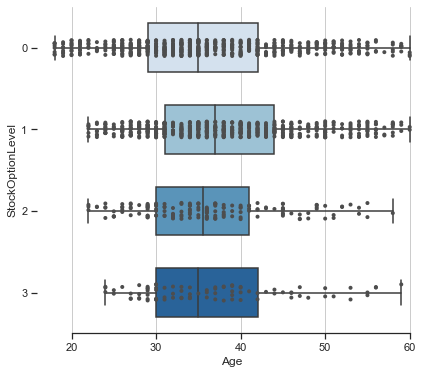

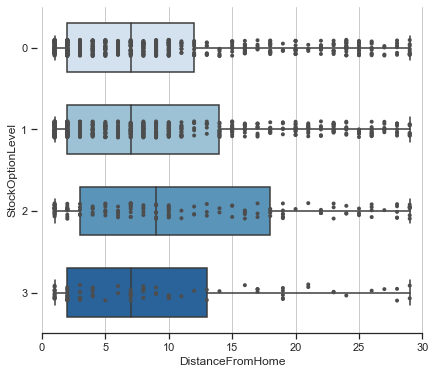

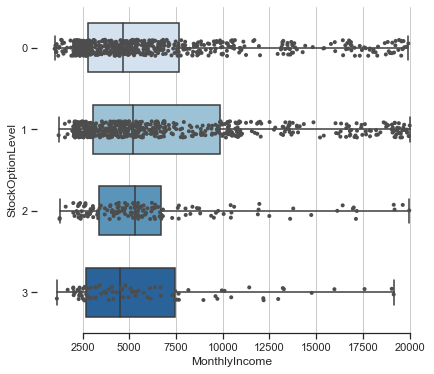

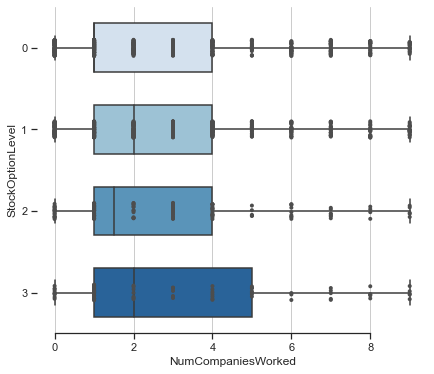

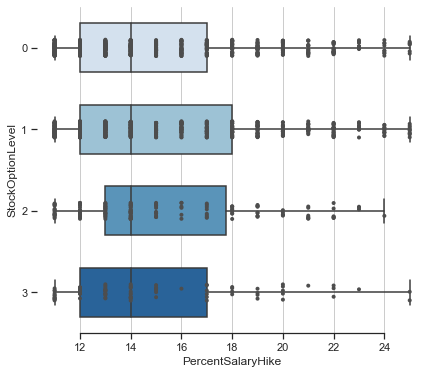

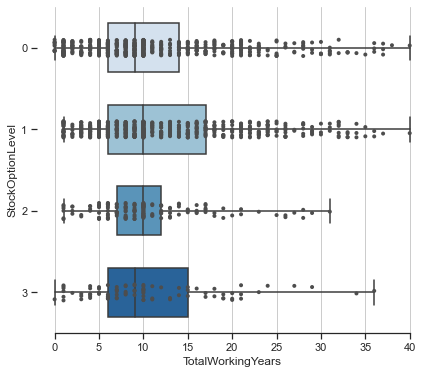

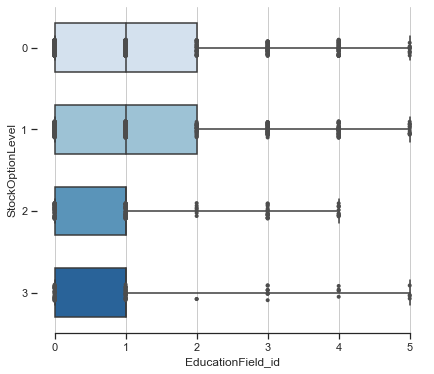

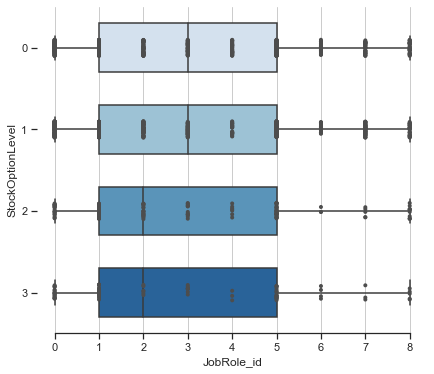

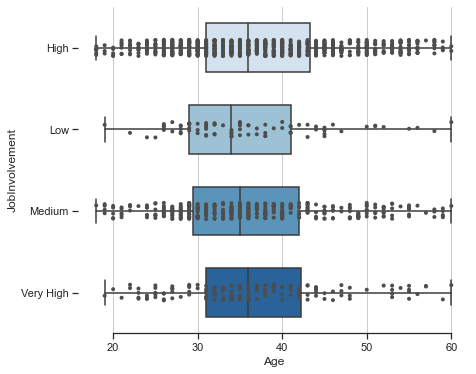

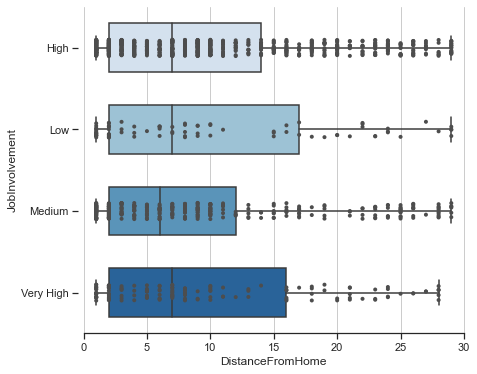

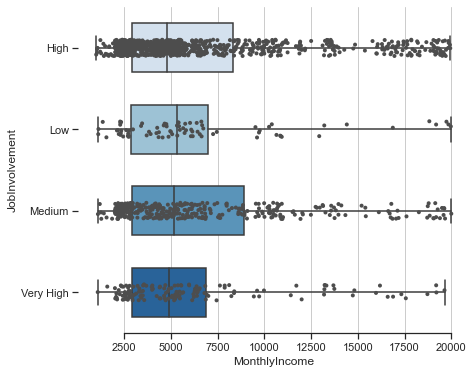

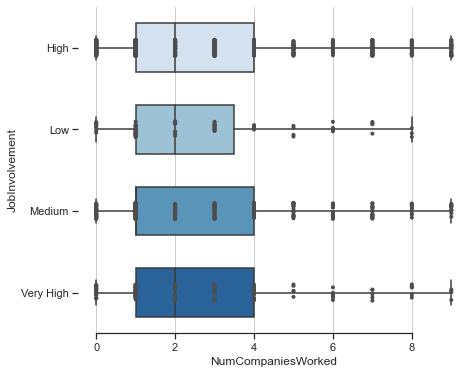

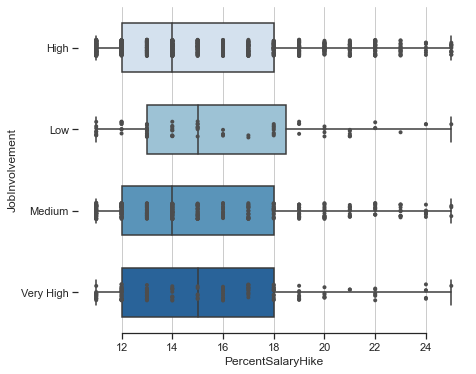

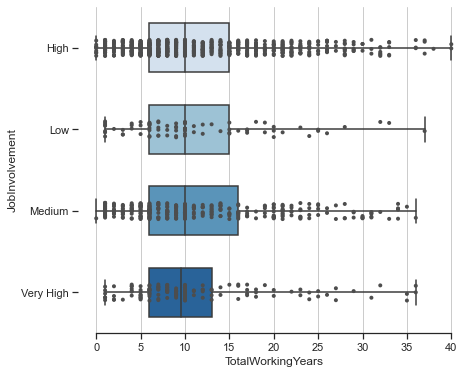

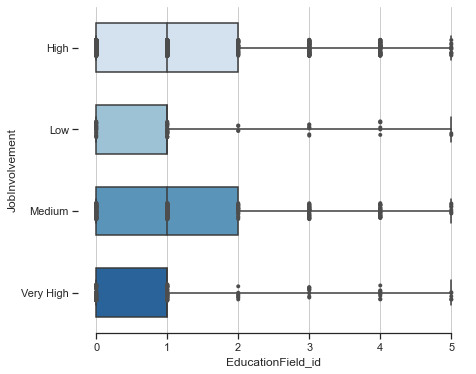

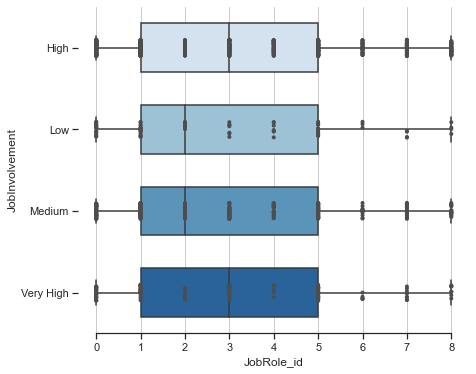

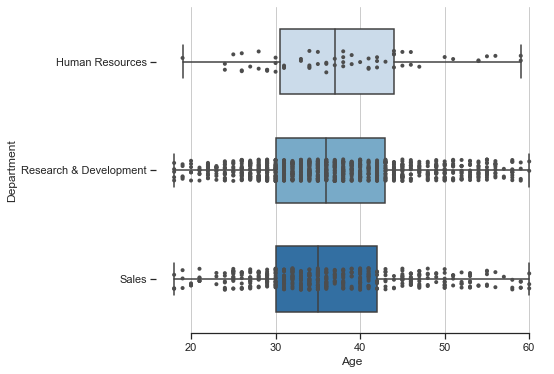

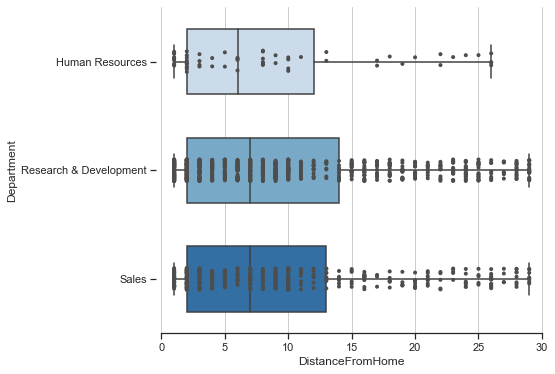

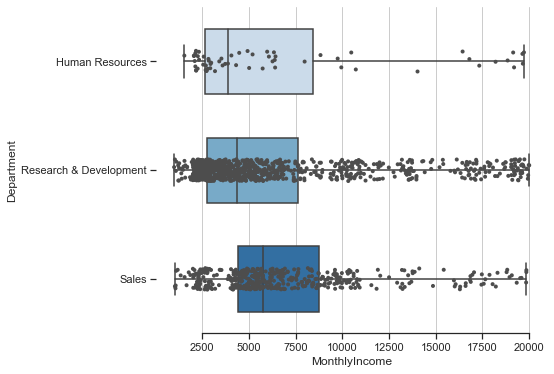

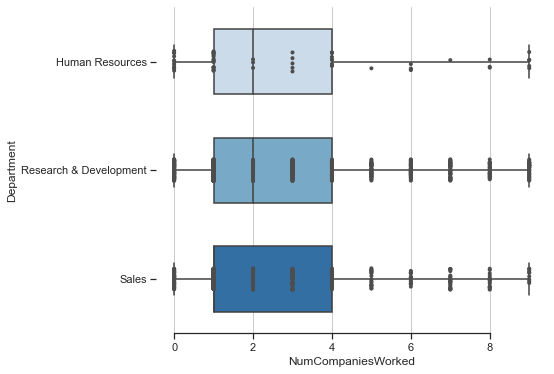

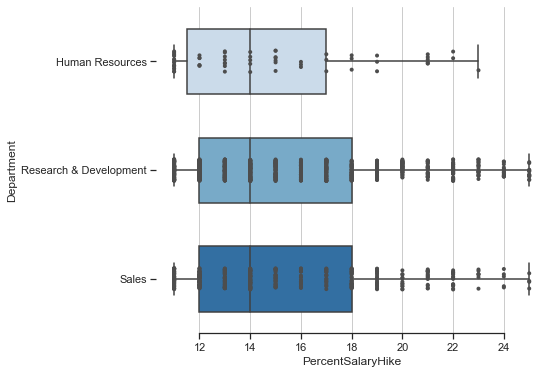

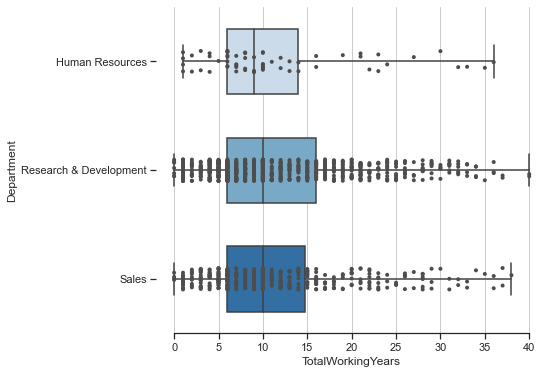

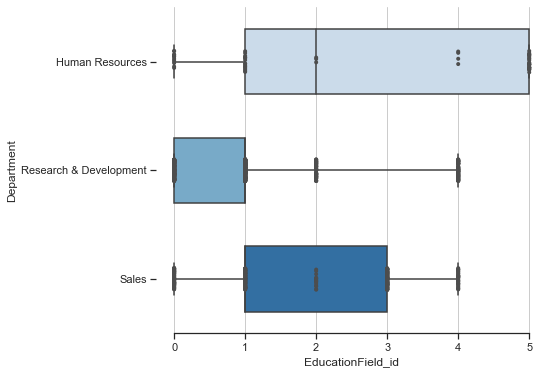

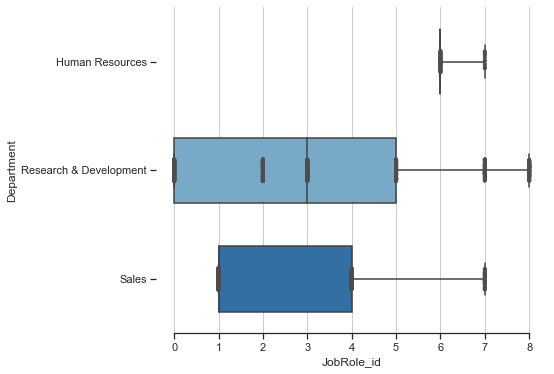

In [44]:
num_values = ['Age', 'DistanceFromHome', 'MonthlyIncome',
              'NumCompaniesWorked', 'PercentSalaryHike',
              'TotalWorkingYears', 'EducationField_id', 'JobRole_id',]
cat_features = ['OverTime', 'PerformanceRating', 'StockOptionLevel', 'JobInvolvement', 'Department']

for cat_feature in cat_features:
    for num_value in num_values:
        AttritionStat.boxplot(num_value, cat_feature)

<a href='#top'>Back to top</a>

<a id='section_5'></a>
### Тестирование модели

Протестируем модель логистической регрессии на тестовой выборке.

In [45]:
y_pred = best_lr.predict(X_test)
print(f'F1-мера на тестовой выборке: {f1_score(y_test, y_pred)}')

F1-мера на тестовой выборке: 0.49333333333333323


Результат работы модели логистической регрессии на тестовой выборке по метрике качества F1 - **0.49**. 

Для подтверждения качества бинарной классификации, дополнительно измерим количественную характеристику ROC-кривой (Receiver operating characteristic) - *AUC-ROC*.


In [46]:
probabilities_test = best_forest.predict_proba(X_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(y_test, probabilities_one_test)

print(auc_roc)

0.7640982923781758


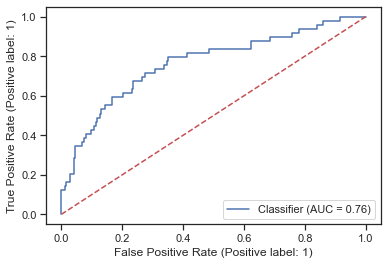

In [47]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, probabilities_one_test)
plt.plot([0, 1], [0, 1],'r--')
plt.show()


Площадь под графиком ROC-кривой равна **0.76**, что эквивалентно вероятности, что классификатор присвоит большее значение случайно выбранному позитивному объекту, чем случайно выбранному негативному объекту. А значит наша модель хорошо справляется с определением положительного класса `Attrition` или другими словами решения сотрудника об уходе из компании.

<a href='#top'>Back to top</a>

### Выводы
- Данные для проекта получены в хорошо подготовленном виде, без пропусков, дубликатов, выбросов
- Часть категориальных признаков была приведена к числовому виду для удобства обучения моделей
- Обучение моделей проведено с помощью трех основных алгоритмов, применяемых для решения задач бинарной классификации: решающем дереве, случайном лесе, а также с помощью логистической регрессии. При этом мы столкнулись с дисбалансом классов, в связи с чем пришлось корректировать гиперпараметр по весу категориальных признаков, чтобы добиться выравнивания.
- Применение алгоритма логистической регрессии (с числом деревьев - **90**, с максимальной глубиной дерева - **4**) позволило получить модель с наилучшим качеством на тестовой выборке **0.49**.
- Вычислен показатель AUC, который дает количественную интерпретацию ROC - кривой ошибок. Получили значение на уровне **0.76**, что демонстрирует безусловную пригодность выбранного метода классификации для построения модели.
- Топ-5 признаков, обладающих наибольшей значимостью для модели, а значит с большей вероятностью влияют на решение сотрудника покинуть компанию это:
* *OverTime - переработки*
* *PerformanceRating - оценка работы сотрудника*
* *StockOptionLevel - уровень вознаграждения в виде опционов на акции компании*
* *JobInvolvement - уровень вовлеченности сотрудника в работу, как много ресурсов (время, знания и пр.) сотрудник тратит на работу*
* *Department - отдел*

<a href='#top'>Back to top</a>